## PROJECT PRESENTATION LINK ##
https://drive.google.com/file/d/19FHWHfrwnrEHjk1sARCEZ9J5lFKt4SN3/view?usp=sharing

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns\

import sklearn.metrics as skl
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#IMPORTING DATA

In [ ]:
df=pd.read_excel("/content/star_classification.xlsx")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


#CLEANING DATA

In [ ]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
df.iloc[:,17]
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

[1.23766096e+18 1.23766488e+18 1.23766096e+18 ... 1.23767948e+18
 1.23766830e+18 1.23766115e+18]
1.237663e+18    22
1.237663e+18    22
1.237663e+18    20
1.237657e+18    18
1.237659e+18    18
                ..
1.237658e+18     1
1.237670e+18     1
1.237651e+18     1
1.237671e+18     1
1.237661e+18     1
Name: obj_ID, Length: 59600, dtype: int64
[135.6891066  144.82610055 142.18878956 ... 224.58740744 212.26862112
 196.89605297]
34.749600     2
135.689107    1
122.736311    1
28.449613     1
216.355348    1
             ..
247.814114    1
177.365643    1
169.790588    1
203.915984    1
196.896053    1
Name: alpha, Length: 99999, dtype: int64
[32.49463184 31.27418489 35.58244418 ... 15.70070739 46.66036528
 49.46464277]
-0.601931     2
 32.494632    1
 37.973185    1
 6.153946     1
 45.335889    1
             ..
 54.546378    1
 2.275880     1
 34.816656    1
 34.287705    1
 49.464643    1
Name: delta, Length: 99999, dtype: int64
[23.87882 24.77759 25.26307 ... 21.16916 25.35039 22.6

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df.drop(df[(df['class'] =='QSO')].index, inplace=True)

In [ ]:
df['class'].replace("GALAXY",0,inplace= True)
df['class'].replace("STAR",1,inplace= True)

In [ ]:
df.head(30)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,0,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,1,-0.000008,2444,54082,232
10,1.237680e+18,328.092076,18.220310,25.77163,22.52042,20.63884,19.78071,19.05765,8102,301,3,27,5.652162e+18,0,0.459596,5020,55852,525
11,1.237662e+18,243.986637,25.738280,23.76761,23.79969,20.98318,19.80745,19.45579,3927,301,4,112,5.322364e+18,0,0.591409,4727,55693,855


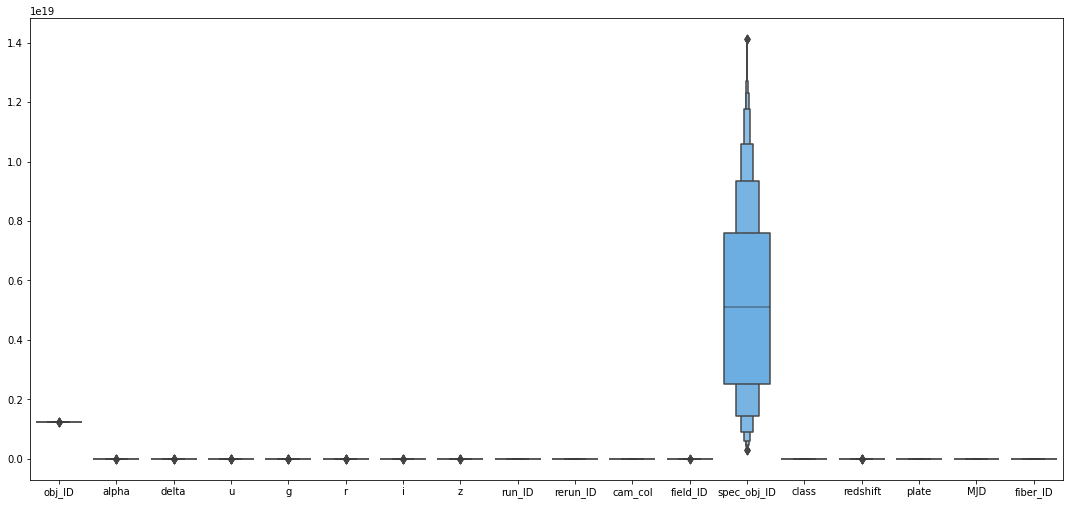

In [ ]:
plt.rcParams["figure.figsize"] = [18.50, 8.50]
out=sns.boxenplot(data=df)

#EXPLORATORY DATA ANALYSIS

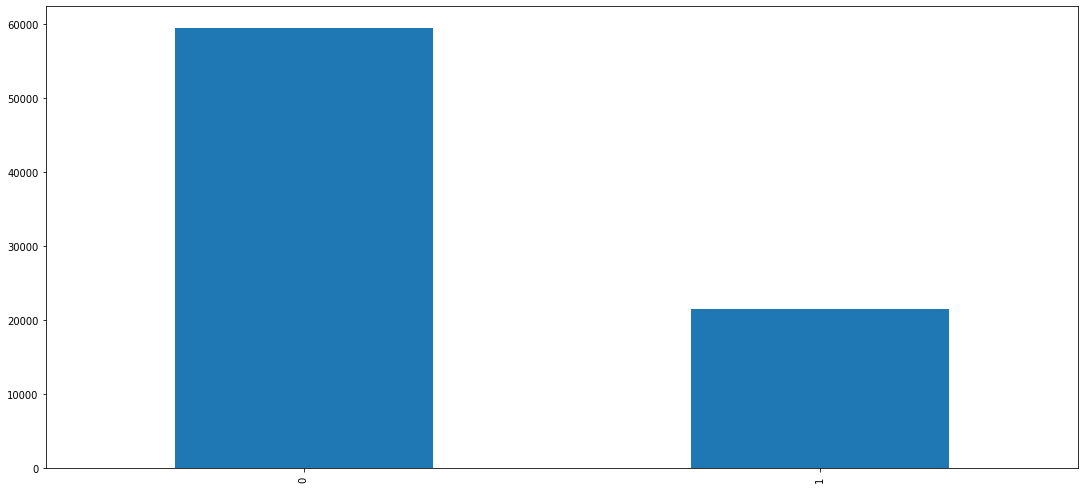

In [ ]:
df['class'].value_counts().plot(kind='bar')

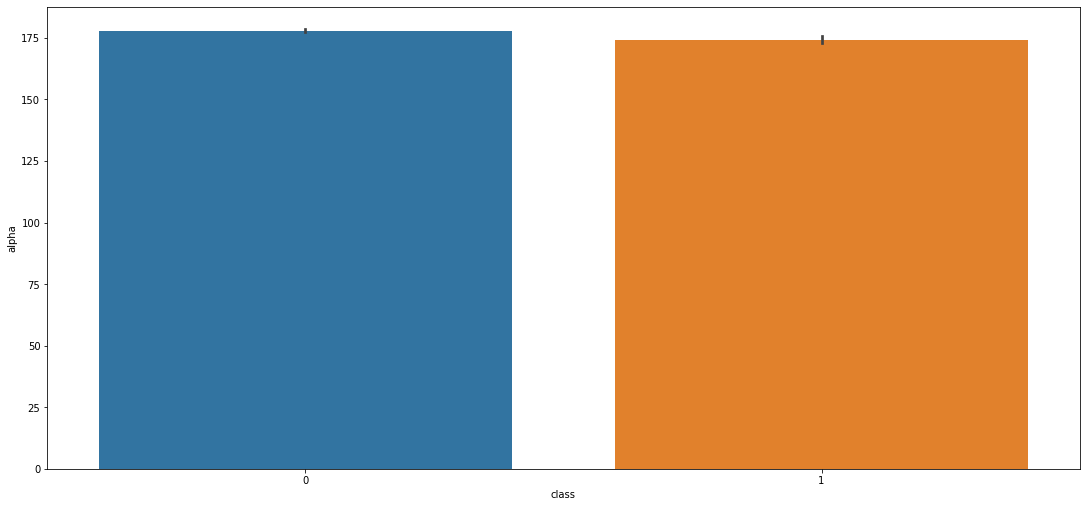

In [ ]:
sns.barplot(x='class',y='alpha',data=df)

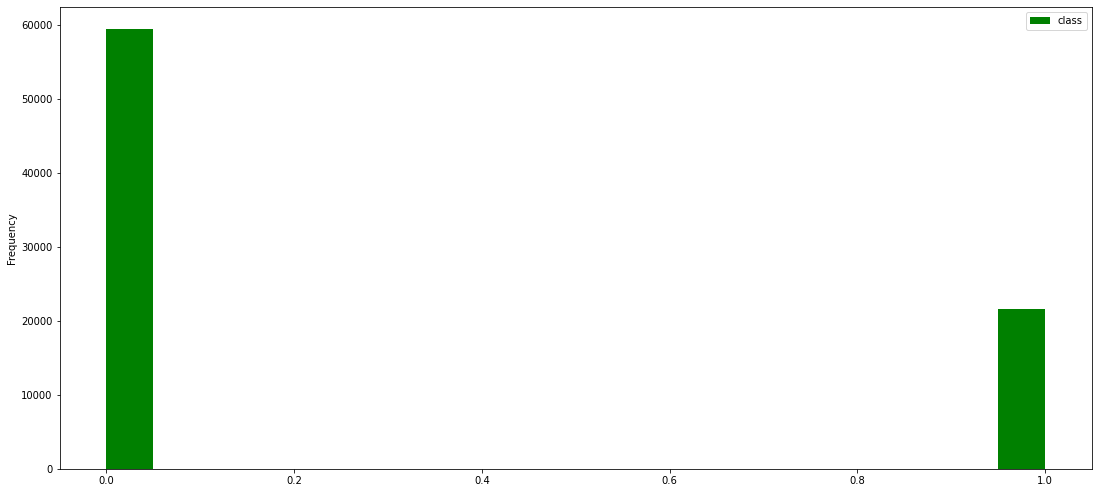

In [ ]:
df[['class']].plot.hist(bins = 20, color='Green')

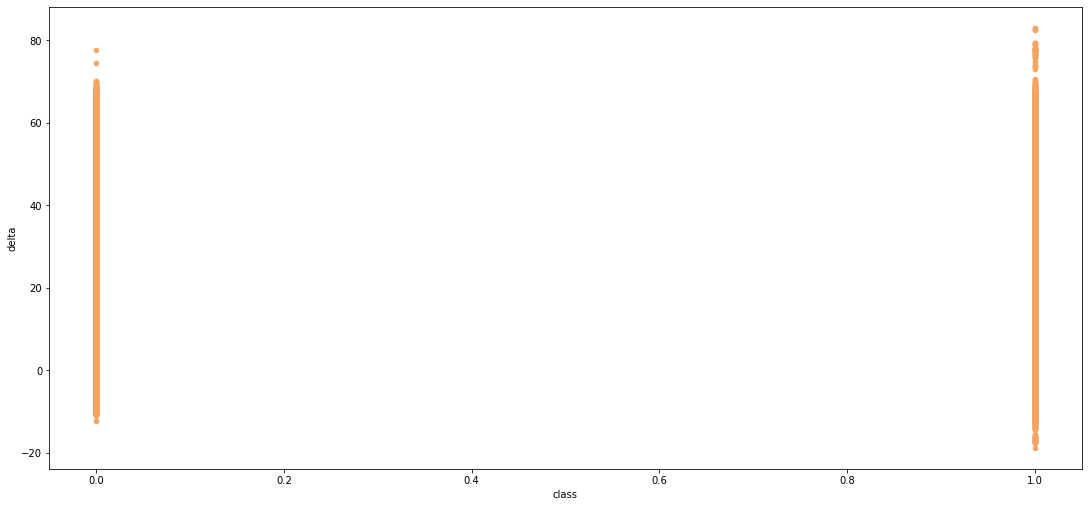

In [ ]:
df.plot.scatter(x = 'class', y = 'delta',
                  color = 'sandybrown')

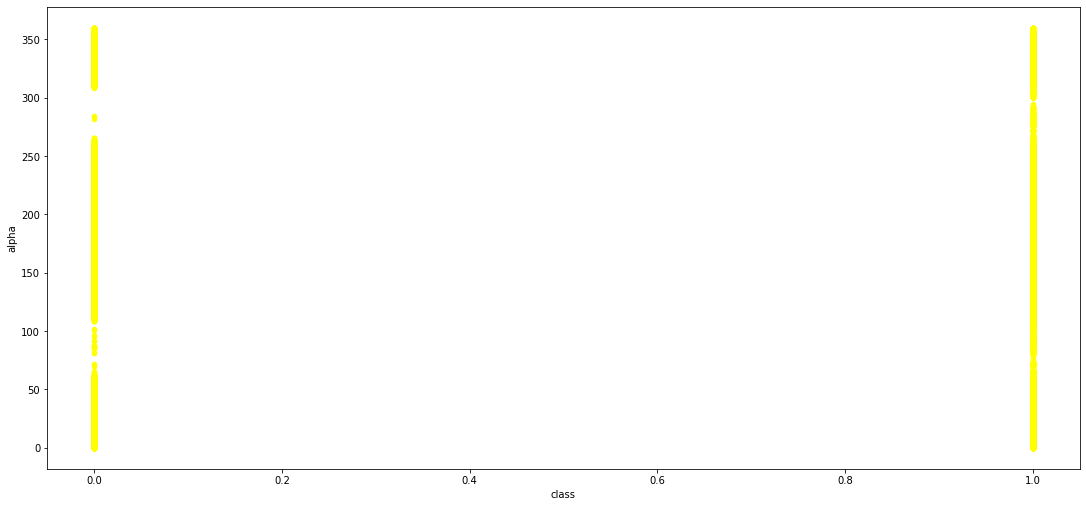

In [ ]:
df.plot.scatter(x = 'class', y = 'alpha',
                  color = 'Yellow')

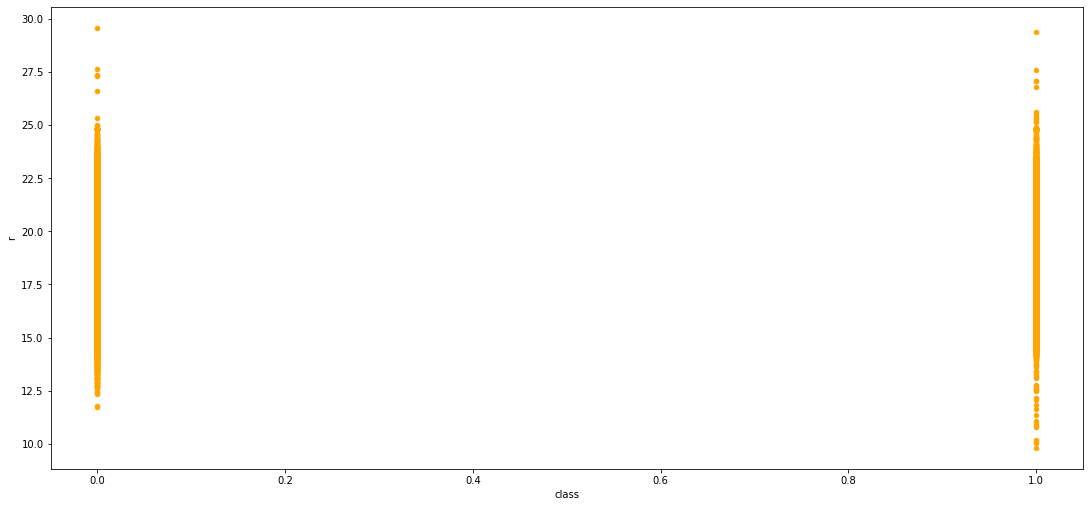

In [ ]:
df.plot.scatter(x = 'class', y = 'r',
                  color = 'Orange')

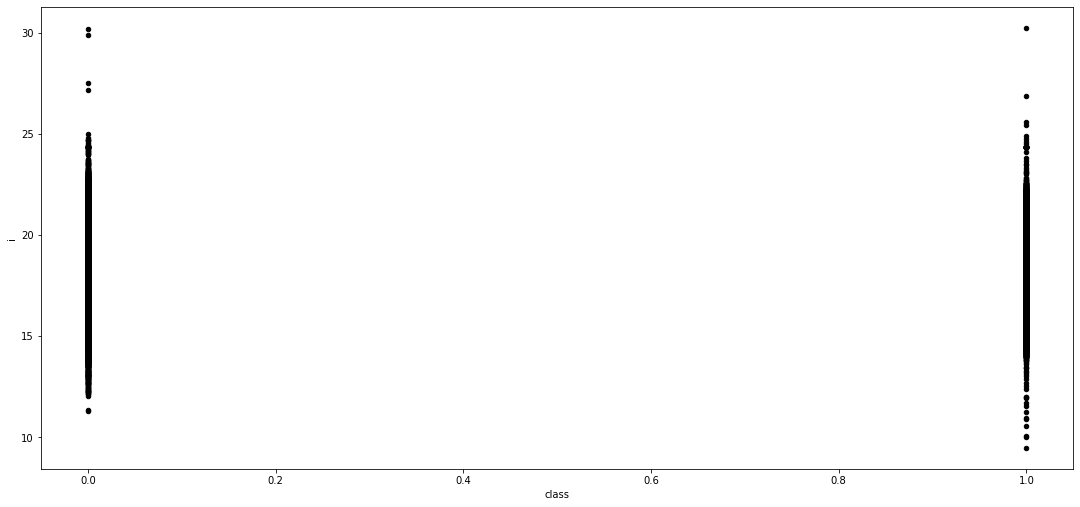

In [ ]:
df.plot.scatter(x = 'class', y = 'i',
                  color = 'Black')

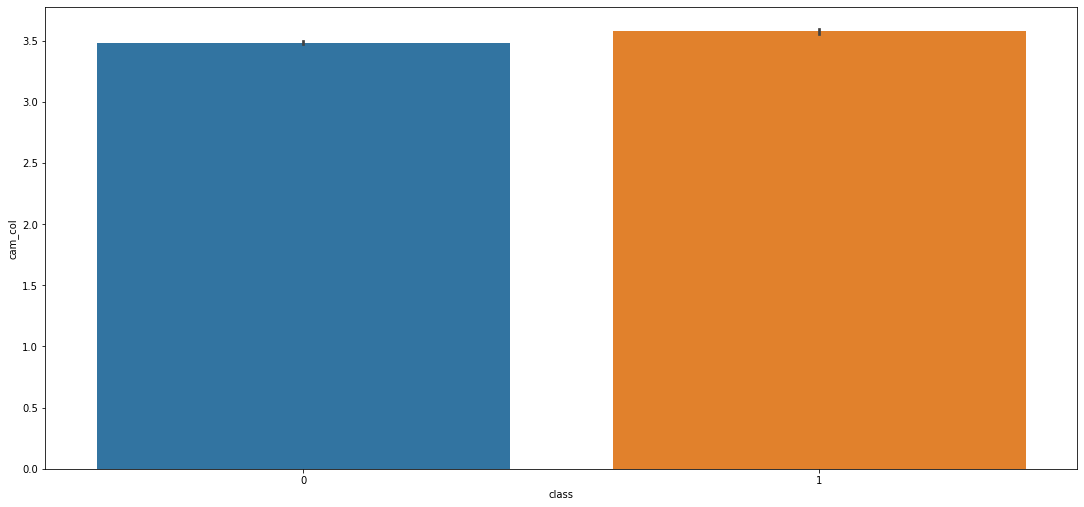

In [ ]:
sns.barplot(x='class',y='cam_col',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


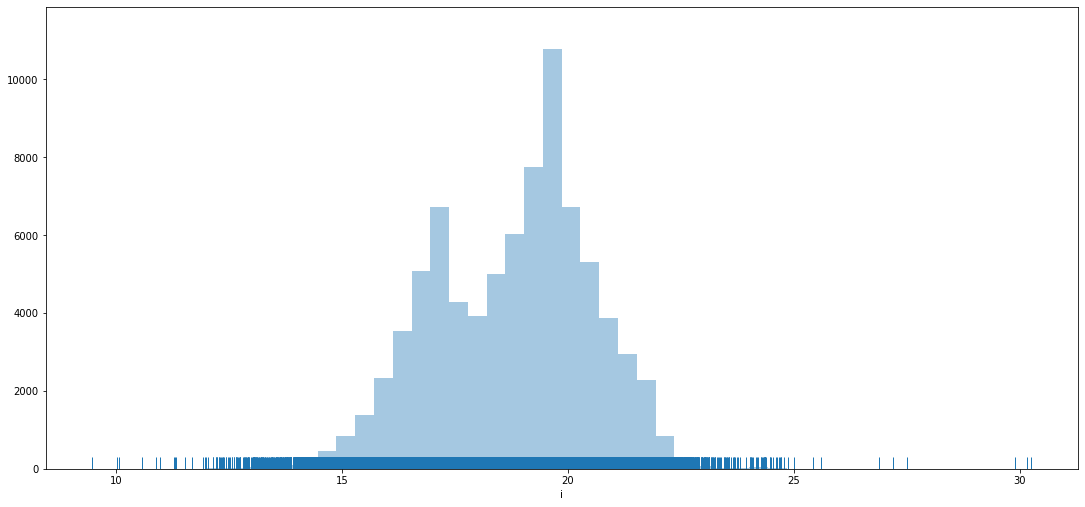

In [ ]:
sns.distplot(df["i"],kde=False,rug=True)

#SPLITTING DATA INTO DEPENDENT VARIABLE AND DEPENDENT VARIABLE

In [ ]:
X=df.drop(['class','obj_ID','rerun_ID'],axis=1)
print(X)
y=df['class']
print(y)

            alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z  run_ID  cam_col  field_ID   spec_obj_ID  redshift  plate  \
0      18.79371    3606        2        79  6.543777e+18  

#SPLITTIND DATA INTO TRAIN AND TEST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
X_train

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
27588,215.574120,62.177673,18.72005,17.59578,17.11516,16.78721,16.59111,2078,5,194,6.824501e+17,0.038596,606,52365,563
86821,238.786428,10.842504,21.57455,19.54163,18.49916,18.09019,17.84613,5322,4,194,5.496703e+18,-0.000489,4882,55721,218
87201,136.067796,39.475237,19.44429,16.99360,15.84369,15.41227,15.17944,2963,6,103,3.545561e+18,-0.000088,3149,54806,372
94595,200.750302,37.674365,25.46946,21.96782,20.20168,19.33401,18.83569,4510,6,31,4.484598e+18,0.495793,3983,55603,505
87594,201.618180,47.307368,25.55429,24.91524,21.89072,20.58991,19.90273,3699,6,96,8.341818e+18,0.726512,7409,56809,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73404,218.839892,18.290913,18.63453,16.93743,16.11860,15.65399,15.28905,5194,2,677,3.108755e+18,0.050880,2761,54534,529
6923,37.968995,-3.898980,23.22944,23.00701,21.40472,21.89845,21.02765,7865,4,168,1.049229e+19,0.432186,9319,58043,117
25581,244.748696,17.179246,19.57920,18.64170,18.31612,18.19012,18.17476,4671,2,113,4.585889e+18,-0.000458,4073,55663,360
23272,32.749877,30.456177,20.42665,17.81851,16.83270,16.43194,16.19016,7941,6,93,7.063012e+18,0.000028,6273,56243,880


In [ ]:
y_train

27588    0
86821    1
87201    1
94595    0
87594    0
        ..
73404    0
6923     0
25581    1
23272    1
43997    0
Name: class, Length: 64831, dtype: int64

#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [ ]:
skl.mean_absolute_error(y_test,y_pred)

0.266966929911155

#KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.84


#BAGGING

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [ ]:
print('Max depth:', clf.tree_.max_depth)

Max depth: 20


In [ ]:
from sklearn import tree 
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_11 <= 0.00
|   |--- feature_11 <= -0.00
|   |   |--- feature_11 <= -0.00
|   |   |   |--- class: 0
|   |   |--- feature_11 >  -0.00
|   |   |   |--- feature_11 <= -0.00
|   |   |   |   |--- feature_3 <= 25.39
|   |   |   |   |   |--- feature_0 <= 11.73
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  11.73
|   |   |   |   |   |   |--- feature_4 <= 22.62
|   |   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 15.04
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  15.04
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 208.89
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  208.89
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  22.62
|   |   |   |   

#RANDOM FOREST

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators=100, random_state=0)
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 0.003146594274432379


In [ ]:
Classifier.score(X_test,y_test)

0.9968534057255676

#BOOSTING

Adaptive Boosting

In [ ]:
#Adaboosting
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier( 
                            n_estimators=100,
                            learning_rate=0.1,
                            random_state=42)
adaclf.fit(X_train,y_train)
y_pred_1 = adaclf.predict(X_test)
ab=mean_absolute_error(y_test, y_pred_1)
print(ab)

0.006169792694965449


In [ ]:
adaclf.score(X_test,y_test)

0.9938302073050346

Gradient Boosting

In [ ]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error

In [ ]:
#Gradient boosting
classifier1 = GradientBoostingClassifier(max_depth=4,n_estimators=15,learning_rate=0.1,random_state=0)
classifier1.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=15, random_state=0)

In [ ]:
y_pred = classifier1.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.0011722606120434353

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9988277393879565

Extreme Gradient Boosting


In [ ]:
#ExtremeGradient Boosting
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100,
                   learning_rate=0.1,
                   random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
eg=mean_absolute_error(y_test, y_pred)
print(eg)

0.0013573543928923988


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9986426456071076

#NEURAL NETWORK

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model
history= model.fit(X_train, y_train, epochs= 2000)

Epoch 1/2000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2026/2026 [==============================] - 3s 1ms/step - loss: 0.1178 - accuracy: 0.9691 - precision: 0.9334 - a=recall: 0.9518
Epoch 2/2000
2026/2026 [==============================] - 3s 1ms/step - loss: 0.0537 - accuracy: 0.9838 - precision: 0.9532 - a=recall: 0.9878
Epoch 3/2000
2026/2026 [==============================] - 3s 1ms/step - loss: 0.0493 - accuracy: 0.9852 - precision: 0.9564 - a=recall: 0.9896
Epoch 4/2000
2026/2026 [==============================] - 3s 1ms/step - loss: 0.0476 - accuracy: 0.9862 - precision: 0.9583 - a=recall: 0.9913
Epoch 5/2000
2026/2026 [==============================] - 3s 1ms/step - loss: 0.0540 - accuracy: 0.9870 - precision: 0.9602 - a=recall: 0.9925
Epoch 6/2000
2026/2026 [==============================] - 3s 1ms/step - loss: 0.0420 - accuracy: 0.9883 - precision: 0.9636 - a=recall: 0.9938
Epoch 7/2000
2026/2026 [==============================] - 3s 1ms/step - loss: 0.0430 - accuracy: 0.9877 - precision: 0.9627 - a=recall: 0.9924
Epoch 8/2000